### 회귀(Regression)---------------------------------------

*수치값 예측

*선형 회귀 (LinearRegression): 독립변수와 종속변수 선형관계

In [1]:
# 모듈로딩-------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
# 데이터 준비------------------------------------------------------------------
jumsu=[49,62,74,82,96,100]
hour=[1,2,3,4,5,6]

dataDF=pd.DataFrame({'jumsu':jumsu,'hour':hour})

In [3]:
dataDF.head(2)

,jumsu,hour
0,49,1
1,62,2


### 목표 : 시간에 따른 점수 예측

- 데이터 피쳐 : hour

- 타겟 피쳐 : jumsu

In [4]:
# 시간과 점수와의 관계 확인

import matplotlib.pyplot as plt

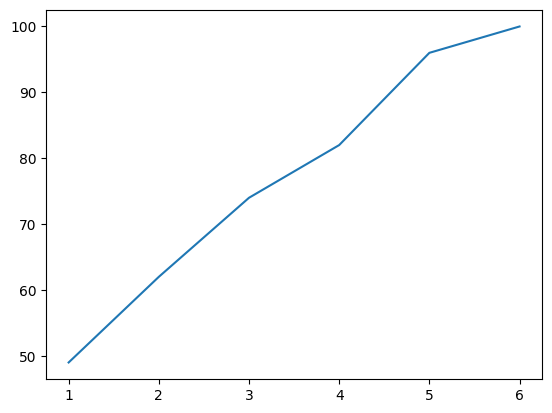

In [7]:
# 시각화로 확인
plt.plot(dataDF.hour, dataDF.jumsu)

In [8]:
# 상관계수 확인
dataDF.corr()

,jumsu,hour
jumsu,1.000000,0.992308
hour,0.992308,1.000000


(array([1., 1., 1., 1., 1., 1.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

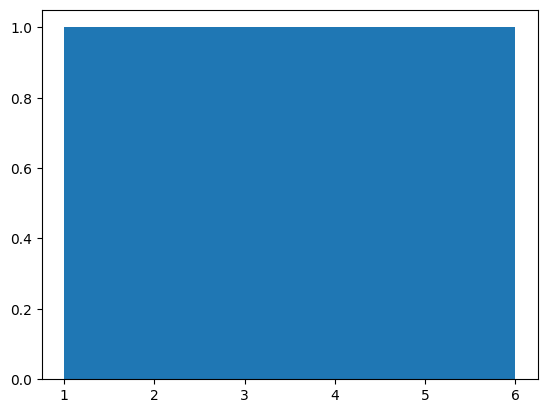

In [10]:
plt.hist(dataDF.hour,bins=6)

### 학습 방법 선정
- 독립 & 종속 변수 관계 확인
- 데이터 + 라벨 => 지도학습
- 점수를 예측하기 ==> 회귀(regression)

In [11]:
# (1) 모델 객체 생성
model = LinearRegression()

In [15]:
# (2) 학습-----학습용 데이터
#model.fit(dataDF.hour, dataDF.jumsu)
X=dataDF.hour.to_numpy().reshape(-1,1)
y=dataDF.jumsu

In [16]:
X.shape, y.shape

((6, 1), (6,))

In [18]:
model.fit(X,y)

LinearRegression()

In [19]:
# (3) 회귀계수 확인
model.coef_, model.intercept_

(array([10.42857143]), 40.66666666666668)

In [23]:
# (4) 예측 => predict(20)
y_pre=model.predict(X)

In [24]:
# R2스퀘어 값
model.score(X,y)

0.9846758398107885

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y,y_pre)

4.936507936507919

### 목표 : 시간과 과외 횟수에 따른 점수 예측

- 과외 횟수 컬럼 추가

- 데이터 변수 : 시간, 과외 횟수

- 타겟 변수 : 점수

- 선형 회귀식 : 점수 = 시간 * coef_1 + 과외횟수 * coef_2 + intercept_

In [27]:
# 데이터 준비------------------------------------------------------------------
jumsu=[49,62,74,82,96,100]
hour=[1,2,3,4,5,6]
cnt=[0,0,1,2,2,1]

dataDF=pd.DataFrame({'jumsu':jumsu,'cnt':cnt,'hour':hour})

In [28]:
dataDF.head(2)

,jumsu,cnt,hour
0,49,0,1
1,62,0,2


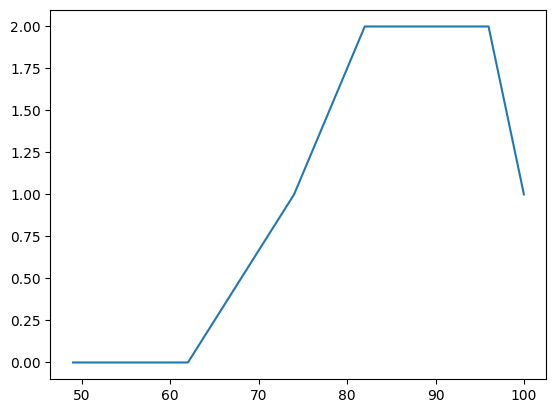

In [30]:
# 독립변수 - 종속변수 관계
plt.plot(dataDF.jumsu, dataDF.cnt)

In [31]:
dataDF.corr()

,jumsu,cnt,hour
jumsu,1.000000,0.761987,0.992308
cnt,0.761987,1.000000,0.717137
hour,0.992308,0.717137,1.000000


In [33]:
# 다중선형회귀=============================================================
model2=LinearRegression()

In [36]:
X=dataDF[['hour','cnt']]

In [37]:
X.shape

(6, 2)

In [38]:
y=dataDF.jumsu

In [39]:
model2.fit(X,y)

LinearRegression()

In [42]:
# 회귀계수 및 절편
model2.coef_,model2.intercept_

(array([9.64705882, 2.27941176]), 41.12254901960786)